# Tickets demand analysis

## Investigation Overview

Here the idea is to find demand pattern in the historical dataset based on following:
- Demand of tickets (passengers boarded) based on different timeframes like monthly, weekly, weekends and weekdays.
- Demand of tickets per source and destination bus stops.
- Demand of tickets based on trip number and trip direction.
- Demand of tickets with respect to ticket types.

## Dataset Overview

In [1]:
# importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# Setting the plot to be embedded inline
%matplotlib inline

In [2]:
df = pd.read_csv("cleaned_tickets_sold_dataset.csv")
df.head()

,ETD_DATETIME,ETD_WAYBILL_NO,ETD_ROUTE_NO,ETD_ROUTE_TYPE,ETD_TRIP_NO,ETD_TICKET_TYPE,ETD_AMOUNT,ETD_DEPOT_CODE,ETD_CUR_STOP_NAME,ETD_DST_STOP_NAME,ETD_KMS,ETD_TICKET_TYPE_DESCR,ETD_TRIP_DIRECTION,ETD_TICKET_NO,ETD_CUR_STOP_NO,ETD_DST_STOP_NO,PASSENGERS,WEEK,MONTH,WEEKDAY
0,2018-08-01 22:50:58,620282,1,1,1,1,250,201,BENGALURU,BHADRAVATHI,265,PASSENGER,U,264972,1,16,1,30,8,2
1,2018-08-01 21:56:58,620281,1,1,1,1,725,201,BENGALURU,TIPTUR,146,PASSENGER,U,215302,1,9,5,30,8,2
2,2018-08-01 21:58:11,620281,1,1,1,1,250,201,BENGALURU,BHADRAVATHI,265,PASSENGER,U,215303,1,16,1,30,8,2
3,2018-08-01 22:30:57,620281,1,1,1,1,500,201,BENGALURU,BHADRAVATHI,265,PASSENGER,U,215304,1,16,2,30,8,2
4,2018-08-01 22:31:36,620281,1,1,1,1,145,201,BENGALURU,TIPTUR,146,PASSENGER,U,215305,1,9,1,30,8,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466956 entries, 0 to 466955
Data columns (total 20 columns):
ETD_DATETIME             466956 non-null object
ETD_WAYBILL_NO           466956 non-null int64
ETD_ROUTE_NO             466956 non-null int64
ETD_ROUTE_TYPE           466956 non-null int64
ETD_TRIP_NO              466956 non-null int64
ETD_TICKET_TYPE          466956 non-null int64
ETD_AMOUNT               466956 non-null int64
ETD_DEPOT_CODE           466956 non-null int64
ETD_CUR_STOP_NAME        466956 non-null object
ETD_DST_STOP_NAME        466956 non-null object
ETD_KMS                  466956 non-null int64
ETD_TICKET_TYPE_DESCR    466956 non-null object
ETD_TRIP_DIRECTION       466956 non-null object
ETD_TICKET_NO            466956 non-null int64
ETD_CUR_STOP_NO          466956 non-null int64
ETD_DST_STOP_NO          466956 non-null int64
PASSENGERS               466956 non-null int64
WEEK                     466956 non-null int64
MONTH                    466956 non-nu

- Dataset has 466956 tickets sold, starting from 1st Aug 2018 till on 31 Dec 2018.
- Date time column is decomposed to analyse no of passengers in different time spans.
- To condsider bus stops, columns ETD_CUR_STOP_NO and ETD_DST_STOP_NO should be used these columns contains number uniquely assigned to each bus stops. 

## Demand analyis based on different timeframes

In [4]:
def distributionPlot(a, ax):
    sb.barplot(x=a.index, y=a, color=default_color, ax=ax)

### Month and week wise average passengers distribution

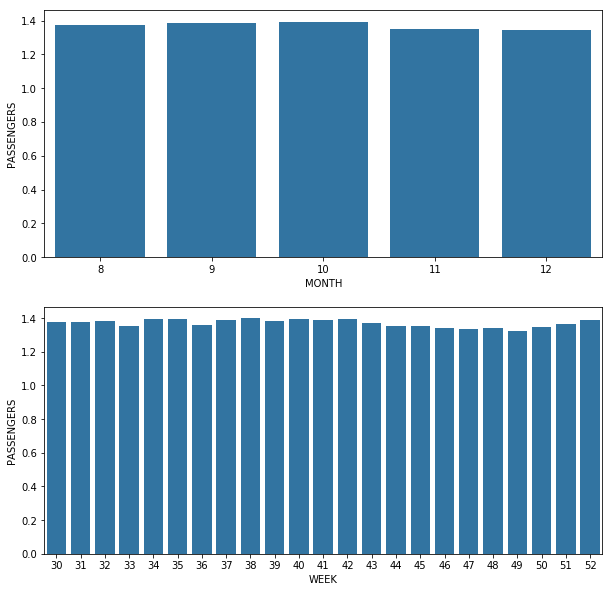

In [30]:
fig, ax = plt.subplots(nrows=2, figsize = [10,10])

default_color = sb.color_palette()[0]

for x,y in [(0,"MONTH"),(1,"WEEK")]:
    distributionPlot(df.groupby(y).PASSENGERS.mean(), ax[x])

plt.show()

### Week days wise average passengers distribution

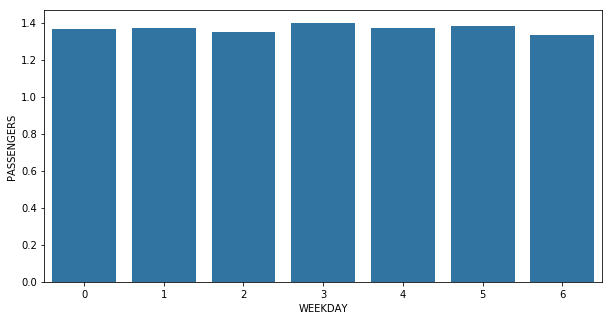

In [6]:
fig, ax = plt.subplots(nrows=1, figsize = [10,5])
distributionPlot(df.groupby("WEEKDAY").PASSENGERS.mean(), ax)

- Here monthly average passengers observation, it looks like average demand increases from August to September. Then November and December average demand is same.
- Week of the year wise average passengers observation, it is consistent with month wise average passengers. But 52th week, which is the last week, there is a sudden surge in average demand. It may be because of winter vacation.
- Consider the weekday wise average passengers distribution. Here Thursday looks like more passengers board in comparison to other days of the week.

## Demand analyis based on source and destination bus stop

In [12]:
a = pd.pivot_table(data=df, values="PASSENGERS", index=["ETD_CUR_STOP_NO"], columns=["ETD_DST_STOP_NO"], aggfunc='mean')



In [14]:
a.set_index(pd.Series(a.index,dtype='str').apply(lambda x : x+"_cur"), inplace=True)
a.columns = pd.Series(a.columns,dtype='str').apply(lambda x : x+"_dst")

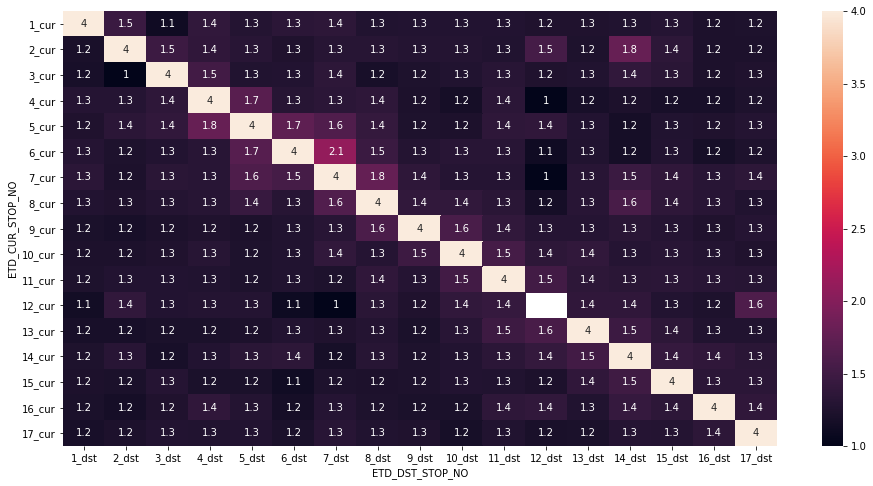

In [22]:
fig, ax = plt.subplots(nrows=1, figsize = [16,8])
sb.heatmap(a, ax = ax, annot=True)

In [31]:
df.groupby("ETD_CUR_STOP_NO").ETD_CUR_STOP_NAME.unique()

ETD_CUR_STOP_NO
1       [BENGALURU]
2     [BASAV.BUS.S]
3     [JHCROSS/DSH]
4     [NELAMANGALA]
5        [TUMAKURU]
6           [GUBBI]
7          [NITTUR]
8        [KB CROSS]
9          [TIPTUR]
10       [ARSIKERE]
11       [BANAVARA]
12     [MATHIGATTA]
13          [KADUR]
14          [BIRUR]
15       [TARIKERE]
16    [BHADRAVATHI]
17     [SHIVAMOGGA]
Name: ETD_CUR_STOP_NAME, dtype: object

- Here there is not much variation in the heatmap. Though there are few blocks which shows higher demand in comparison to other source and destination bus stops. Routes like GUBBI-NITTUR, NITTUR-KB CROSS,  BASAV.BUS.S-BHADRAVATHI.
- It seems for BENGALURU (1) to SHIVAMOGGA (17), it requires more data from other depots to come up with more variation in the data.

## Demand analysis based on ticket type

In [24]:
df.ETD_TICKET_TYPE.unique()

array([ 1, 11, 12, 33, 10,  2, 14, 15, 21, 32, 57, 17, 13, 19, 16])

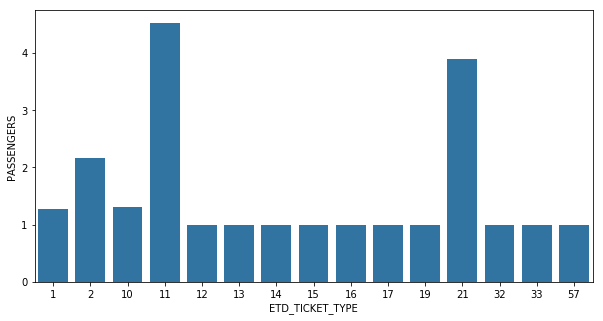

In [27]:
fig, ax = plt.subplots(nrows=1, figsize = [10,5])
distributionPlot(df.groupby("ETD_TICKET_TYPE").PASSENGERS.mean(), ax=ax)

In [32]:
df.groupby("ETD_TICKET_TYPE").ETD_TICKET_TYPE_DESCR.unique()

ETD_TICKET_TYPE
1     [PASSENGER, -----------, I.PASSENGER]
2                [LUGGAGE TKT, -----------]
10                            [POLICEWARNT]
11                            [STUDENT PAS]
12                            [GENERAL PAS]
13                            [MLA/MLC PAS]
14                            [HANDICAP PA]
15                             [BLIND PASS]
16                            [FREEDOM FIG]
17                            [AWARD WINNE]
19                                 [EX-MLC]
21                 [-----------, INSP CASE]
32                [-----------, JOURNALIST]
33               [-----------, SENIORCITIZ]
57                            [RETIRED STA]
Name: ETD_TICKET_TYPE_DESCR, dtype: object

- Here ticket type 11 and 21 have covered most of the passengers. Where ticket type 11 is the highest one which is actually student pass.